In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

# Import data file.

In [2]:
df = pd.read_csv('Downloads/youtube_trending_data.csv')
df.head()

,video_id,title,channel_title,category,publish_time,country,views,likes,dislikes,comment_count,tags,sentiment_score,trending_duration_days
0,vid_000,Video 84,Channel_0,News,2024-01-12,DE,123632,23789,7400,19968,vlog,0.43,21
1,vid_001,Video 54,Channel_1,Music,2024-02-08,IN,947012,45190,8082,9588,breaking news,0.79,5
2,vid_002,Video 71,Channel_2,News,2024-01-02,IN,261451,35757,4171,11829,breaking news,0.02,5
3,vid_003,Video 46,Channel_3,News,2024-01-03,IN,13051,10323,4360,8053,breaking news,0.06,19
4,vid_004,Video 45,Channel_4,Music,2024-02-25,GB,714107,42475,2502,3330,vlog,-0.79,27


# Basic Information.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                100 non-null    object 
 1   title                   100 non-null    object 
 2   channel_title           100 non-null    object 
 3   category                100 non-null    object 
 4   publish_time            100 non-null    object 
 5   country                 100 non-null    object 
 6   views                   100 non-null    int64  
 7   likes                   100 non-null    int64  
 8   dislikes                100 non-null    int64  
 9   comment_count           100 non-null    int64  
 10  tags                    100 non-null    object 
 11  sentiment_score         100 non-null    float64
 12  trending_duration_days  100 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 10.3+ KB


# Cheaking Null values.

In [4]:
df.isnull().sum()

video_id                  0
title                     0
channel_title             0
category                  0
publish_time              0
country                   0
views                     0
likes                     0
dislikes                  0
comment_count             0
tags                      0
sentiment_score           0
trending_duration_days    0
dtype: int64

# Convert datatype into date formate.

In [7]:
df['publish_time'] =pd.to_datetime(df['publish_time'])
print(df['publish_time'].dtypes)

datetime64[ns]


In [9]:
df.dropna(inplace=True)

# Sentiment Analysis on title and tags.

In [11]:
df['country'] = df['country'].str.upper()
df.head()

,video_id,title,channel_title,category,publish_time,country,views,likes,dislikes,comment_count,tags,sentiment_score,trending_duration_days
0,vid_000,Video 84,Channel_0,News,2024-01-12,DE,123632,23789,7400,19968,vlog,0.43,21
1,vid_001,Video 54,Channel_1,Music,2024-02-08,IN,947012,45190,8082,9588,breaking news,0.79,5
2,vid_002,Video 71,Channel_2,News,2024-01-02,IN,261451,35757,4171,11829,breaking news,0.02,5
3,vid_003,Video 46,Channel_3,News,2024-01-03,IN,13051,10323,4360,8053,breaking news,0.06,19
4,vid_004,Video 45,Channel_4,Music,2024-02-25,GB,714107,42475,2502,3330,vlog,-0.79,27


In [33]:
from textblob import TextBlob

In [34]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [36]:
df['title_sentiment'] =  df['title'].apply(get_sentiment)
df['tags_sentiment'] =  df['tags'].apply(get_sentiment)

In [37]:
print(df[['title', 'title_sentiment', 'tags', 'tags_sentiment']].head())


      title  title_sentiment           tags  tags_sentiment
0  Video 84              0.0           vlog             0.0
1  Video 54              0.0  breaking news             0.0
2  Video 71              0.0  breaking news             0.0
3  Video 46              0.0  breaking news             0.0
4  Video 45              0.0           vlog             0.0


# Perform Some Statistical Analysis

In [38]:
print(df[['title_sentiment', 'tags_sentiment']].describe())

       title_sentiment  tags_sentiment
count            100.0      100.000000
mean               0.0        0.064545
std                0.0        0.096300
min                0.0        0.000000
25%                0.0        0.000000
50%                0.0        0.000000
75%                0.0        0.136364
max                0.0        0.250000


In [40]:
print(df[['likes', 'dislikes', 'comment_count', 'views', 'trending_duration_days']].describe())

              likes     dislikes  comment_count          views  \
count    100.000000   100.000000     100.000000     100.000000   
mean   26038.620000  5153.300000    9814.050000  468160.010000   
std    14510.070173  2706.230796    5621.983847  282030.958758   
min      912.000000   133.000000       9.000000   13051.000000   
25%    14778.500000  3034.750000    4973.000000  210764.500000   
50%    26281.500000  5227.000000    9724.000000  462000.000000   
75%    38851.500000  7282.000000   14444.750000  716829.750000   
max    49615.000000  9872.000000   19968.000000  981525.000000   

       trending_duration_days  
count              100.000000  
mean                13.890000  
std                  8.947541  
min                  1.000000  
25%                  6.000000  
50%                 13.500000  
75%                 21.250000  
max                 29.000000  


# Create Bar-Graph for sentiment analysis.

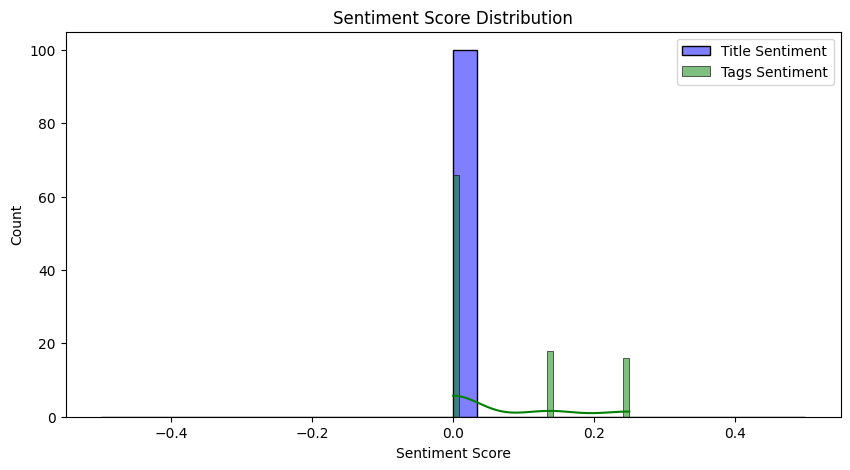

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10, 5))
sns.histplot(df['title_sentiment'], bins=30, kde=True, color='blue', label='Title Sentiment')
sns.histplot(df['tags_sentiment'], bins=30, kde=True, color='green', label='Tags Sentiment')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.legend()
plt.show()

In [ ]:
# Perform Category Level sentiment aver

In [42]:
genre_sentiment = df.groupby('category')[['title_sentiment', 'tags_sentiment']].mean()
print(genre_sentiment.sort_values(by='title_sentiment', ascending=False))

               title_sentiment  tags_sentiment
category                                      
Education                  0.0        0.076299
Entertainment              0.0        0.063920
Gaming                     0.0        0.059917
Music                      0.0        0.060606
News                       0.0        0.082955
Sports                     0.0        0.042929


In [43]:
print(df[['views', 'likes', 'title_sentiment']].corr())

                    views     likes  title_sentiment
views            1.000000  0.053894              NaN
likes            0.053894  1.000000              NaN
title_sentiment       NaN       NaN              NaN
